In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
# Data Cleaning

In [12]:
#write the columns names in small letter and replace spaces with under score
df.columns=df.columns.str.lower().str.replace(' ','_')

In [6]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

id
[1 2 3 4 5]
10999

warehouse_block
['D' 'F' 'A' 'B' 'C']
5

mode_of_shipment
['Flight' 'Ship' 'Road']
3

customer_care_calls
[4 2 3 5 6]
6

customer_rating
[2 5 3 1 4]
5

cost_of_the_product
[177 216 183 176 184]
215

prior_purchases
[3 2 4 6 5]
8

product_importance
['low' 'medium' 'high']
3

gender
['F' 'M']
2

discount_offered
[44 59 48 10 46]
65

weight_in_gms
[1233 3088 3374 1177 2484]
4034

reached.on.time_y.n
[1 0]
2



In [7]:
df.dtypes

id                      int64
warehouse_block        object
mode_of_shipment       object
customer_care_calls     int64
customer_rating         int64
cost_of_the_product     int64
prior_purchases         int64
product_importance     object
gender                 object
discount_offered        int64
weight_in_gms           int64
reached.on.time_y.n     int64
dtype: object

In [8]:
strings =list(df.dtypes[df.dtypes=='object'].index)
strings

['warehouse_block', 'mode_of_shipment', 'product_importance', 'gender']

In [9]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [10]:
df.head()

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached.on.time_y.n
0,1,d,flight,4,2,177,3,low,f,44,1233,1
1,2,f,flight,4,5,216,2,low,m,59,3088,1
2,3,a,flight,2,2,183,4,low,m,48,3374,1
3,4,b,flight,3,3,176,4,medium,m,10,1177,1
4,5,c,flight,2,2,184,3,medium,f,46,2484,1


# EDA

In [13]:
df.mode_of_shipment.value_counts()

ship      7462
flight    1777
road      1760
Name: mode_of_shipment, dtype: int64

In [14]:
df.reached_on_time_y_n.value_counts(normalize = True)

1    0.596691
0    0.403309
Name: reached_on_time_y_n, dtype: float64

<AxesSubplot:xlabel='count', ylabel='mode_of_shipment'>

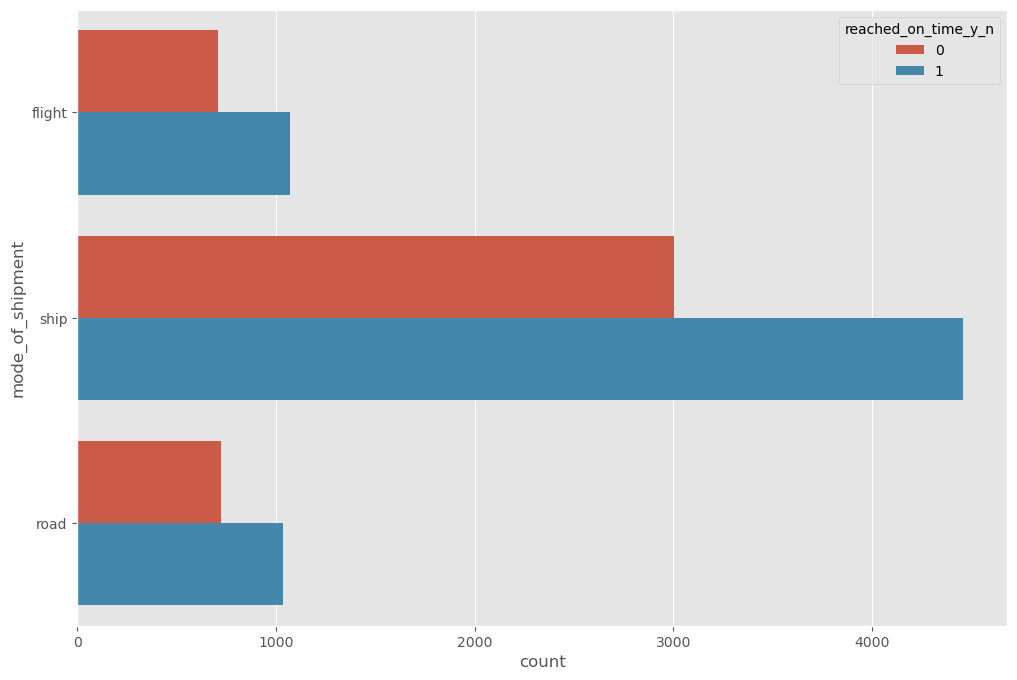

In [15]:
# plot between mode_of_shipment and reached_on_time_y_n
sns.countplot(y=df['mode_of_shipment'], hue=df['reached_on_time_y_n'])

In [16]:
df.warehouse_block.value_counts()

f    3666
d    1834
a    1833
b    1833
c    1833
Name: warehouse_block, dtype: int64

<AxesSubplot:xlabel='count', ylabel='warehouse_block'>

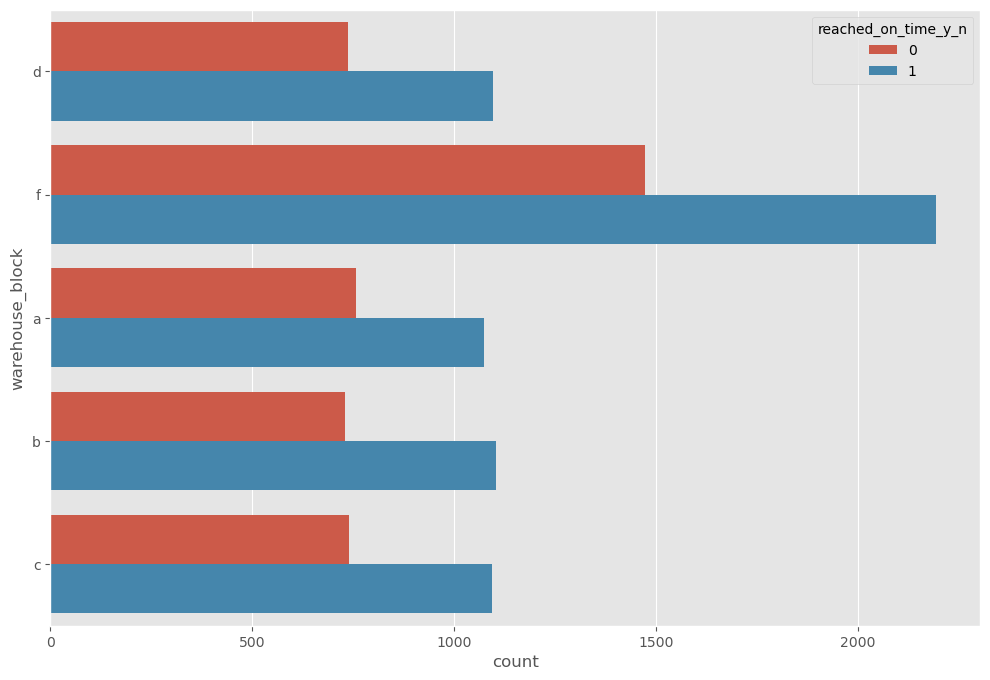

In [17]:
# plot between warehouse_block and reached_on_time_y_n
sns.countplot(y=df['warehouse_block'], hue=df['reached_on_time_y_n'])

In [18]:
df.customer_care_calls.value_counts()

4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: customer_care_calls, dtype: int64

<AxesSubplot:xlabel='count', ylabel='customer_care_calls'>

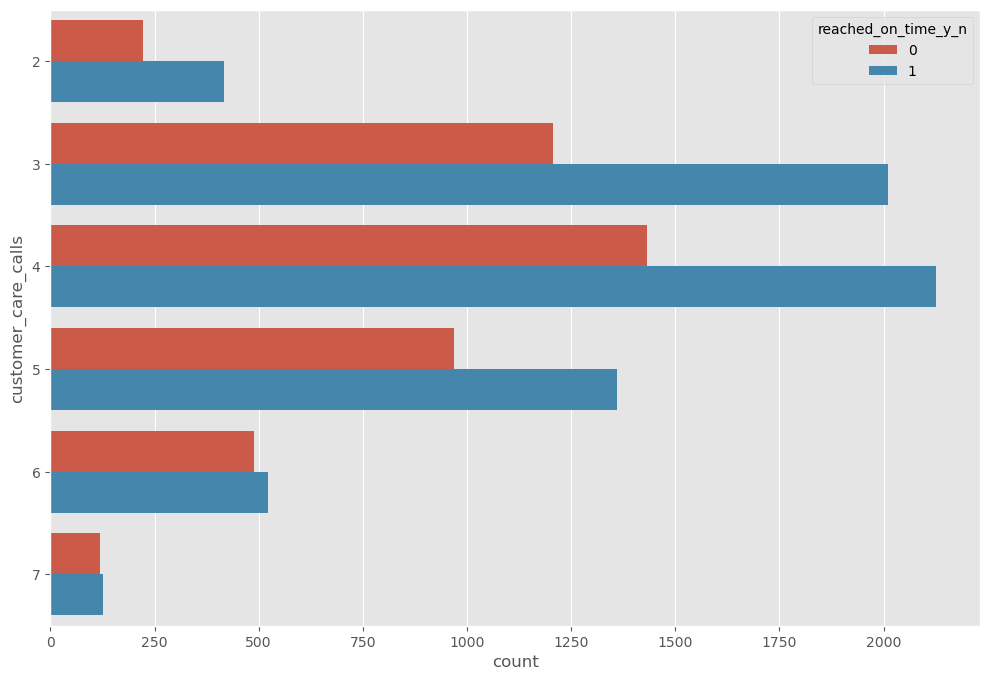

In [19]:
# plot between customer_care_calls and reached_on_time_y_n
sns.countplot(y=df['customer_care_calls'], hue=df['reached_on_time_y_n'])

In [20]:
df.customer_rating.value_counts()

3    2239
1    2235
4    2189
5    2171
2    2165
Name: customer_rating, dtype: int64

<AxesSubplot:xlabel='count', ylabel='customer_rating'>

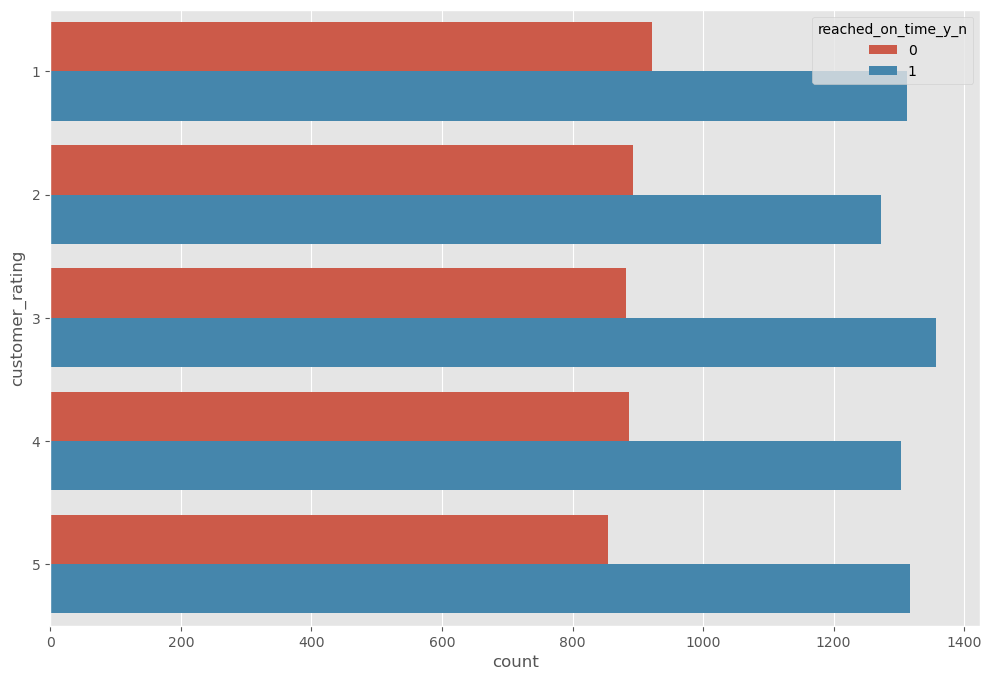

In [21]:
# plot between customer_rating and reached_on_time_y_n
sns.countplot(y=df['customer_rating'], hue=df['reached_on_time_y_n'])

In [22]:
df.corr(method ='pearson')

,id,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,reached_on_time_y_n
id,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
cost_of_the_product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
reached_on_time_y_n,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


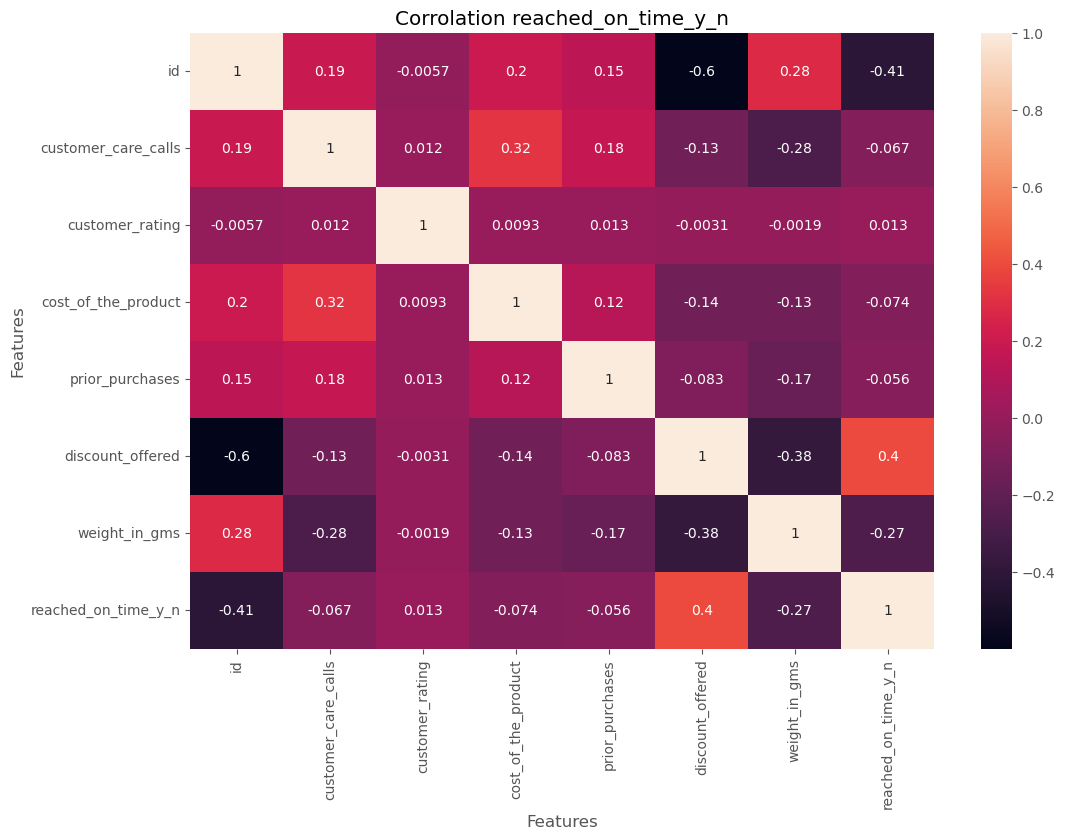

In [23]:
#Checking for corrolation
corrolation_matrix=df.corr(method ='pearson')

sns.heatmap(corrolation_matrix,annot=True)
plt.title('Corrolation reached_on_time_y_n')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

# Setting up Validation Frame Work

In [24]:
# perfom train/validation/test using sklearn
from sklearn.model_selection import train_test_split

In [25]:
# divide the data into train,validation,test
df_full_train, df_test =train_test_split(df, test_size = 0.2, random_state=42 )

In [26]:
len(df_full_train), len(df_test)

(8799, 2200)

In [27]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [28]:
len(df_train), len(df_val), len(df_test)

(6599, 2200, 2200)

In [29]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [30]:
y_train = df_train.reached_on_time_y_n.values
y_val = df_val.reached_on_time_y_n.values
y_test = df_test.reached_on_time_y_n.values

In [31]:
del df_train['reached_on_time_y_n']
del df_test['reached_on_time_y_n']
del df_val['reached_on_time_y_n']

# Mutual Informaton

In [32]:
# mutual information : concept from information theory that tells us how much we can learn about one variable if we know
#the value of another
from sklearn.metrics import mutual_info_score

In [33]:
mutual_info_score(df_full_train.reached_on_time_y_n, df_full_train.product_importance)

0.0006494208852182715

In [34]:
# apply mutual info to the whole data
def mutual_info_reached_on_time_y_n_score(series):
    return mutual_info_score(series, df_full_train.reached_on_time_y_n)

In [35]:
mi = df_full_train.apply(mutual_info_reached_on_time_y_n_score)

In [36]:
# sort by des
mi.sort_values(ascending = False)

reached_on_time_y_n    0.673985
id                     0.673985
weight_in_gms          0.317468
discount_offered       0.149471
cost_of_the_product    0.016235
prior_purchases        0.006218
customer_care_calls    0.002896
product_importance     0.000649
customer_rating        0.000283
warehouse_block        0.000182
mode_of_shipment       0.000045
gender                 0.000003
dtype: float64

# One hot Encoding

In [37]:
# use one hot encoding for categorical variables
from sklearn.feature_extraction import DictVectorizer

In [38]:
train_dicts = df_train.to_dict(orient='records')

In [39]:
train_dicts[0]

{'id': 1488,
 'warehouse_block': 'f',
 'mode_of_shipment': 'road',
 'customer_care_calls': 6,
 'customer_rating': 1,
 'cost_of_the_product': 219,
 'prior_purchases': 6,
 'product_importance': 'low',
 'gender': 'f',
 'discount_offered': 10,
 'weight_in_gms': 2385}

In [40]:
dv = DictVectorizer(sparse=False)

In [41]:
X_train = dv.fit_transform(train_dicts)

In [42]:
val_dicts = df_val.to_dict(orient='records')

In [43]:
X_val = dv.transform(val_dicts)

# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [46]:
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [47]:
model.intercept_[0]

0.6315708252169328

In [48]:
# this is our w(weight)
model.coef_[0].round(3)

array([-0.   , -0.04 ,  0.018,  0.098,  0.301,  0.33 , -0.   ,  0.257,
        0.159,  0.216, -0.051,  0.272,  0.224,  0.135,  0.048,  0.148,
        0.155,  0.152,  0.129, -0.   ])

In [49]:
# hard prediction predict 0 and 1
model.predict(X_train)

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [50]:
# soft probability predict likelyhood of churning
model.predict_proba(X_train)

array([[0.2284357 , 0.7715643 ],
       [0.03509553, 0.96490447],
       [0.00119505, 0.99880495],
       ...,
       [0.5990088 , 0.4009912 ],
       [0.42930345, 0.57069655],
       [0.54459998, 0.45540002]])

In [51]:
# using it on valitaton dataset
y_pred =model.predict_proba(X_val)[:,1]

In [52]:
reached_on_time_y_n_decision = (y_pred >= 0.5)

In [53]:
# check the accuracy of the model
accuracy = (y_val == reached_on_time_y_n_decision).mean()

In [54]:
print(round(accuracy,2))

0.65


In [55]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] =reached_on_time_y_n_decision.astype(int)
df_pred['actual'] = y_val

In [56]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [57]:
df_pred

,probability,prediction,actual,correct
0,0.855576,1,1,True
1,0.930877,1,1,True
2,0.456537,0,1,False
3,0.381081,0,1,False
4,0.980661,1,1,True
...,...,...,...,...
2195,0.832994,1,1,True
2196,0.618617,1,0,False
2197,0.231909,0,1,False
2198,0.990815,1,1,True


In [58]:
(y_val == reached_on_time_y_n_decision).sum()

1420

In [59]:
len(X_val)

2200

In [60]:
1420/2200

0.6454545454545455

In [61]:
thresholds = np.linspace(0, 1,21)

scores= []
for t in thresholds:
    reached_on_time_y_n_decision =(y_pred >=t)
    score = (y_val == reached_on_time_y_n_decision).mean()
    print('%.2f%.3f'%(t,score))
    scores.append(score)

0.000.593
0.050.593
0.100.593
0.150.593
0.200.591
0.250.593
0.300.597
0.350.604
0.400.625
0.450.640
0.500.645
0.550.640
0.600.653
0.650.659
0.700.659
0.750.648
0.800.634
0.850.619
0.900.604
0.950.578
1.000.407


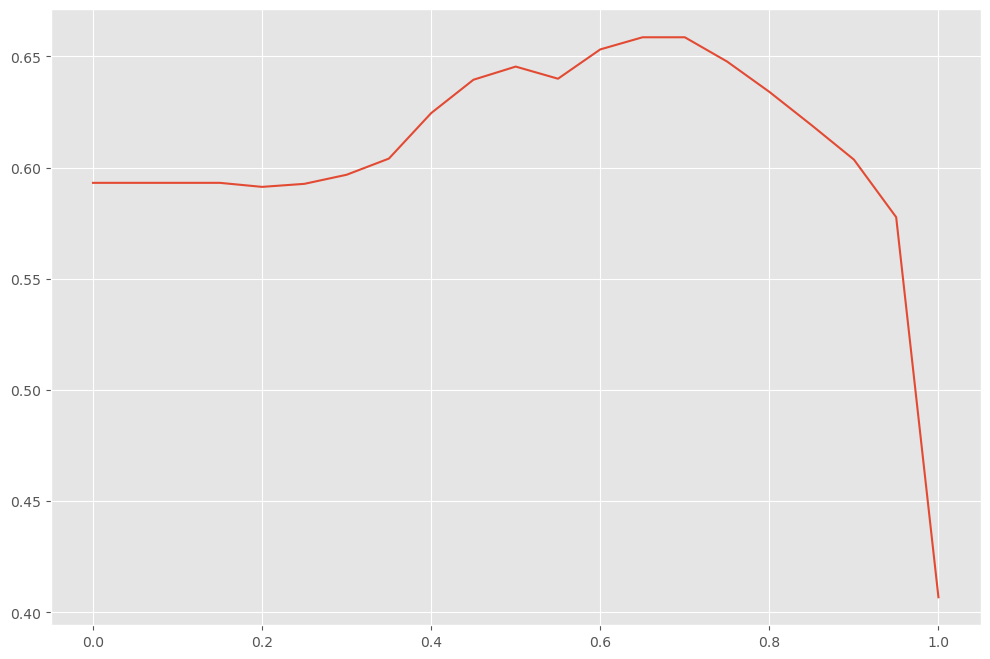

In [62]:
plt.plot(thresholds, scores)

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(y_val,y_pred >=0.65)

0.6586363636363637

In [65]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from math import sqrt

In [66]:
alpha_values = [0, 0.01, 0.1, 1, 10]

In [67]:
rmse_score = {}

In [68]:
for alpha in alpha_values:
    model = Ridge(alpha=alpha,solver='sag', random_state=42)
    model.fit(X_train, y_train)

In [69]:
y_pred = model.predict(X_val)

In [70]:
rmse =round(sqrt(mean_squared_error(y_val,y_pred)),3)
rmse_score[alpha]= rmse

In [71]:
for alpha, rmse in rmse_score.items():
    print(f'Alpha={alpha}: RMSE ={rmse}')

Alpha=10: RMSE =0.441


In [72]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [73]:
actual_positive=(y_val==1)

actual_negative=(y_val==0)

In [74]:
len(y_val)

2200

In [75]:
(y_val == reached_on_time_y_n_decision).mean()

0.4068181818181818

In [76]:
(y_val == reached_on_time_y_n_decision).sum()

895

In [77]:
t=0.5
predict_positive = (y_pred >=t)
predict_negative = (y_pred < t)

In [78]:
tp = (actual_positive & predict_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [79]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [80]:
tp, tn, fp, fn

(880, 554, 341, 425)

In [81]:
p = tp / (tp + fp)
p

0.7207207207207207

In [82]:
r = tp / (tp + fn)
r

0.6743295019157088

In [83]:
scores =  []
thresholds = np.arange(0.0, 1.0 , 0.01)
for t in thresholds:
    actual_positive=(y_val==1)
    actual_negative=(y_val==0)
    
    predict_positive = (y_pred >=t)
    predict_negative = (y_pred < t)
    
    tp = (actual_positive & predict_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    r = tp / (tp + fn)
    p = tp / (tp + fp)
    
    f1 = 2 * (p*r)/(p+r) 
    
    scores.append((t, tp, tn, fp, fn,p,r,f1))

In [84]:
columns = ['threshold', 'tp', 'tn', 'fp', 'fn', 'r', 'p','f1']
df_scores =pd.DataFrame(scores, columns=columns)

In [85]:
df_scores

,threshold,tp,tn,fp,fn,r,p,f1
0,0.00,1305,0,895,0,0.593182,1.000000,0.744650
1,0.01,1305,0,895,0,0.593182,1.000000,0.744650
2,0.02,1305,0,895,0,0.593182,1.000000,0.744650
3,0.03,1305,0,895,0,0.593182,1.000000,0.744650
4,0.04,1305,0,895,0,0.593182,1.000000,0.744650
...,...,...,...,...,...,...,...,...
95,0.95,263,895,0,1042,1.000000,0.201533,0.335459
96,0.96,246,895,0,1059,1.000000,0.188506,0.317215
97,0.97,231,895,0,1074,1.000000,0.177011,0.300781
98,0.98,209,895,0,1096,1.000000,0.160153,0.276090


In [86]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer

# Assuming df_full_train is your training dataset with features and target

# Define the KFold object with 5 splits, shuffling the data, and setting a random seed
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Initialize a list to store AUC scores for each fold
auc_scores = []

# Initialize DictVectorizer
vectorizer = DictVectorizer()

# Iterate over different folds of df_full_train
for train_index, val_index in kf.split(df_full_train):
    # Split the data into train and validation sets based on the fold indices
    train_data, val_data = df_full_train.iloc[train_index], df_full_train.iloc[val_index]
    
    # Separate the features (X) and the target (y) variables for train and validation
    X_train, y_train = train_data.drop(columns=['reached_on_time_y_n']), train_data['reached_on_time_y_n']
    X_val, y_val = val_data.drop(columns=['reached_on_time_y_n']), val_data['reached_on_time_y_n']
    
    # Convert feature dataframes to dictionaries and then use DictVectorizer
    X_train_dict = X_train.to_dict(orient='records')
    X_val_dict = X_val.to_dict(orient='records')
    
    X_train_encoded = vectorizer.fit_transform(X_train_dict)
    X_val_encoded = vectorizer.transform(X_val_dict)
    
    # Initialize and train the Logistic Regression model
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train_encoded, y_train)
    
    # Predict probabilities on the validation set
    y_pred_proba = model.predict_proba(X_val_encoded)[:, 1]
    
    # Calculate the AUC score and append it to the list
    auc_score = roc_auc_score(y_val, y_pred_proba)
    auc_scores.append(auc_score)

# Calculate and print the mean AUC score across all folds
mean_auc = sum(auc_scores) / len(auc_scores)
print("Mean AUC:", mean_auc)


Mean AUC: 0.7386440499404587


In [87]:

# Define the C values to iterate over
C_values = [0.01, 0.1, 0.5, 10]

# Initialize KFold with the same parameters as previously
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Initialize lists to store mean and std scores
mean_scores = []
std_scores = []

# Iterate over different C values
for C in C_values:
    # Initialize a list to store AUC scores for each fold
    auc_scores = []
    
    # Iterate over different folds of df_full_train
    for train_index, val_index in kf.split(df_full_train):
        # Split the data into train and validation sets based on the fold indices
        train_data, val_data = df_full_train.iloc[train_index], df_full_train.iloc[val_index]

        # Separate the features (X) and the target (y) variables for train and validation
        X_train, y_train = train_data.drop(columns=['reached_on_time_y_n']), train_data['reached_on_time_y_n']
        X_val, y_val = val_data.drop(columns=['reached_on_time_y_n']), val_data['reached_on_time_y_n']

        # Convert feature dataframes to dictionaries and then use DictVectorizer
        X_train_dict = X_train.to_dict(orient='records')
        X_val_dict = X_val.to_dict(orient='records')

        X_train_encoded = vectorizer.fit_transform(X_train_dict)
        X_val_encoded = vectorizer.transform(X_val_dict)

        # Initialize and train the Logistic Regression model with the current C value
        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train_encoded, y_train)

        # Predict probabilities on the validation set
        y_pred_proba = model.predict_proba(X_val_encoded)[:, 1]

        # Calculate the AUC score and append it to the list
        auc_score = roc_auc_score(y_val, y_pred_proba)
        auc_scores.append(auc_score)
    
    # Calculate the mean and standard deviation of AUC scores for the current C value
    mean_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)
    
    # Append the mean and std scores to the respective lists (rounded to 3 decimal digits)
    mean_scores.append(round(mean_auc, 3))
    std_scores.append(round(std_auc, 3))

# Print the results for each C value
for i, C in enumerate(C_values):
    print(f"C = {C}: Mean AUC = {mean_scores[i]}, Std = {std_scores[i]}")


C = 0.01: Mean AUC = 0.738, Std = 0.01
C = 0.1: Mean AUC = 0.739, Std = 0.01
C = 0.5: Mean AUC = 0.739, Std = 0.009
C = 10: Mean AUC = 0.738, Std = 0.009


In [88]:
import pickle

In [91]:
output_file =f'model_C={C}.bin' 
output_file

'model_C=10.bin'

In [92]:
f_out = open(output_file, 'wb')
pickle.dump((dv, model), f_out)
f_out.close()

In [ ]:
customer = {'id': 1488,
 'warehouse_block': 'f',
 'mode_of_shipment': 'road',
 'customer_care_calls': 6,
 'customer_rating': 1,
 'cost_of_the_product': 219,
 'prior_purchases': 6,
 'product_importance': 'low',
 'gender': 'f',
 'discount_offered': 10,
 'weight_in_gms': 2385}

In [94]:
# load the model
import pickle

In [95]:
model_file = 'model_C=10.bin'

In [96]:
with open(model_file, 'rb') as f_in:
    dv, model = pickle.load(f_in)

In [97]:
dv, model

(DictVectorizer(sparse=False),
 LogisticRegression(C=10, max_iter=1000, solver='liblinear'))

In [98]:
customer = {'id': 1488,
 'warehouse_block': 'f',
 'mode_of_shipment': 'road',
 'customer_care_calls': 6,
 'customer_rating': 1,
 'cost_of_the_product': 219,
 'prior_purchases': 6,
 'product_importance': 'low',
 'gender': 'f',
 'discount_offered': 10,
 'weight_in_gms': 2385}

In [99]:
 X =dv.transform([customer])

In [100]:
 model.predict_proba(X)[0,1]

0.7806860490755715